<a href="https://colab.research.google.com/github/gohenry/DataScienceCoursera/blob/master/ArtAuction_1130_1pm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install --user --upgrade tensorflow

     |████████████████████████████████| 86.3MB 103kB/s 
     |████████████████████████████████| 3.8MB 46.4MB/s 
     |████████████████████████████████| 450kB 37.4MB/s 
     |████████████████████████████████| 81kB 10.7MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import tensorflow as tf
help(tf)



































































































































































































































































































Instructions for updating:
Use `tf.GraphKeys.GLOBAL_VARIABLES` instead.
Help on package tensorflow:

NAME
    tensorflow - TensorFlow root package

PACKAGE CONTENTS
    _api (package)
    app (package)
    audio (package)
    autograph (package)
    bitwise (package)
    compat (package)
    compiler (package)
    config (package)
    contrib (package)
    core (package)
    data (package)
    debugging (package)
    distribute (package)
    distributions (package)
    dtypes (package)
    errors (package)
    estimator (package)
    examples (package)
    experimental (package)
    feature_column (package)
    gfile (package)
    graph_util (package)
    image (package)
    initializers (package)
   

In [2]:
from google.colab import drive
drive.mount ('/content/drive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
cd /content/drive/My Drive

/content/drive/My Drive


In [8]:
ls

'Colab Notebooks'/   logs/             'result_2017_2018 .xlsx'   result.xlsx
 images/             result_2009.xlsx   result2.xlsx


In [0]:
#import the necessary packages
from __future__ import absolute_import, division, print_function, unicode_literals
import functools
import pydot
import keras
import numpy as np
import tensorflow as tf
import pandas as pd
from keras import layers
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.models import Sequential
from keras.preprocessing import image
from keras.utils import np_utils
from keras.utils import layer_utils
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import keras.backend as K
K.set_image_data_format('channels_last')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

from IPython.display import SVG




In [10]:
#load numerical data using Pandas
!pip install -q xlrd
!pip install pillow

cols = ['author','creation_year','height(inch)','width(inch)','estimate_low($)','estimate_high','auction_year','artist_birth','hammer price', 'artist_rank','artist_points','num_bill','wealth_bill','canvas','paper','Acrylic','oil','Mixed media','image']
df = pd.read_excel('result_2009.xlsx', usecols=cols)
df = pd.get_dummies(df, prefix=['auth'], columns = ['author'])
df



,creation_year,height(inch),width(inch),estimate_low($),estimate_high,hammer price,auction_year,image,artist_birth,artist_rank,artist_points,num_bill,wealth_bill,canvas,paper,Acrylic,Mixed media,oil,auth_Ai Weiwei,auth_Alberto Giacometti,auth_Alex Katz,auth_Alexander Calder,auth_Alighiero Boëtti,auth_Andy Warhol,auth_Anselm Kiefer,auth_Antoni Tàpies,auth_Arnulf Rainer,auth_Carl Andre,auth_Christian Boltanski,auth_Christian Marclay,auth_Cindy Sherman,auth_Claes Oldenburg,auth_Cy Twombly,auth_Damien Hirst,auth_Dan Graham,auth_Daniel Buren,auth_David Hockney,auth_Dieter Roth,auth_Douglas Gordon,auth_Ed Ruscha,...,auth_Joseph Beuys,auth_Kader Attia,auth_Kiki Smith,auth_Lawrence Weiner,auth_Louise Bourgeois,auth_Lucio Fontana,auth_Man Ray,auth_Marcel Broodthaers,auth_Marcel Duchamp,auth_Maria Lassnig,auth_Marina Abramovic,auth_Marlene Dumas,auth_Martin Kippenberger,auth_Max Ernst,auth_Mike Kelley,auth_Mona Hatoum,auth_Nam June Paik,auth_Olafur Eliasson,auth_Pablo Picasso,auth_Paul Klee,auth_Paul McCarthy,auth_Pierre Huyghe,auth_Richard Long,auth_Richard Prince,auth_Richard Serra,auth_Rirkrit Tiravanija,auth_Robert Mapplethorpe,auth_Robert Rauschenberg,auth_Rosemarie Trockel,auth_Roy Lichtenstein,auth_Sigmar Polke,auth_Sol LeWitt,auth_Tacita Dean,auth_Thomas Ruff,auth_Thomas Schütte,auth_Tony Cragg,auth_Valie Export,auth_William Kentridge,auth_Yayoi Kusama,auth_Yoko Ono
0,1964.0,5.0,5.0,150000.0,200000.0,NaN,2019.0,images/Andy Warhol-Flowers-1-0.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1964.0,22.0,22.0,1500000.0,2000000.0,1150000.0,2019.0,images/Andy Warhol-Flowers-1-1.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1985.0,20.0,16.0,60000.0,80000.0,NaN,2019.0,images/Andy Warhol-Self-Defense (Positive)-1-2...,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1985.0,20.0,16.0,60000.0,80000.0,50000.0,2019.0,images/Andy Warhol-Self-Defense (Negative)-1-3...,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1983.0,20.0,16.0,50000.0,70000.0,70000.0,2019.0,images/Andy Warhol-Untitled (Four)-1-4.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14699,1999.0,2.0,15.0,149320.0,223980.0,313572.0,2010.0,images/Marlene Dumas-Dancer-3-13.jpg,1953.0,114.0,14262.10,1011.0,3.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14700,1994.0,2.0,19.0,218820.0,281340.0,484530.0,2010.0,"images/Marlene Dumas-""The Peeping Tom ""-3-14.jpg",1953.0,114.0,14262.10,1011.0,3.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14701,1995.0,79.0,39.0,250000.0,350000.0,440000.0,2009.0,images/Marlene Dumas-Evil Eye-3-15.jpg,1953.0,98.0,14765.08,793.0,2.4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14702,1996.0,49.0,27.0,70000.0,100000.0,60000.0,2009.0,images/Marlene Dumas-Transparent Slip-3-16.jpg,1953.0,98.0,14765.08,793.0,2.4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [11]:
#drop rows containing missing data
ccols = ['creation_year','height(inch)','width(inch)','estimate_low($)','estimate_high','auction_year','artist_birth','hammer price', 'artist_rank','artist_points','num_bill','wealth_bill','canvas','paper','Acrylic','oil','Mixed media']
df[ccols] = df[ccols].apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df

,creation_year,height(inch),width(inch),estimate_low($),estimate_high,hammer price,auction_year,image,artist_birth,artist_rank,artist_points,num_bill,wealth_bill,canvas,paper,Acrylic,Mixed media,oil,auth_Ai Weiwei,auth_Alberto Giacometti,auth_Alex Katz,auth_Alexander Calder,auth_Alighiero Boëtti,auth_Andy Warhol,auth_Anselm Kiefer,auth_Antoni Tàpies,auth_Arnulf Rainer,auth_Carl Andre,auth_Christian Boltanski,auth_Christian Marclay,auth_Cindy Sherman,auth_Claes Oldenburg,auth_Cy Twombly,auth_Damien Hirst,auth_Dan Graham,auth_Daniel Buren,auth_David Hockney,auth_Dieter Roth,auth_Douglas Gordon,auth_Ed Ruscha,...,auth_Joseph Beuys,auth_Kader Attia,auth_Kiki Smith,auth_Lawrence Weiner,auth_Louise Bourgeois,auth_Lucio Fontana,auth_Man Ray,auth_Marcel Broodthaers,auth_Marcel Duchamp,auth_Maria Lassnig,auth_Marina Abramovic,auth_Marlene Dumas,auth_Martin Kippenberger,auth_Max Ernst,auth_Mike Kelley,auth_Mona Hatoum,auth_Nam June Paik,auth_Olafur Eliasson,auth_Pablo Picasso,auth_Paul Klee,auth_Paul McCarthy,auth_Pierre Huyghe,auth_Richard Long,auth_Richard Prince,auth_Richard Serra,auth_Rirkrit Tiravanija,auth_Robert Mapplethorpe,auth_Robert Rauschenberg,auth_Rosemarie Trockel,auth_Roy Lichtenstein,auth_Sigmar Polke,auth_Sol LeWitt,auth_Tacita Dean,auth_Thomas Ruff,auth_Thomas Schütte,auth_Tony Cragg,auth_Valie Export,auth_William Kentridge,auth_Yayoi Kusama,auth_Yoko Ono
1,1964.0,22.0,22.0,1500000.0,2000000.0,1150000.0,2019.0,images/Andy Warhol-Flowers-1-1.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1985.0,20.0,16.0,60000.0,80000.0,50000.0,2019.0,images/Andy Warhol-Self-Defense (Negative)-1-3...,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1983.0,20.0,16.0,50000.0,70000.0,70000.0,2019.0,images/Andy Warhol-Untitled (Four)-1-4.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1976.0,8.0,11.0,70000.0,100000.0,70000.0,2019.0,images/Andy Warhol-Torso-1-5.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1985.0,8.0,16.0,30000.0,50000.0,72000.0,2019.0,"images/Andy Warhol-Are You ""Different?"" (Posit...",1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14699,1999.0,2.0,15.0,149320.0,223980.0,313572.0,2010.0,images/Marlene Dumas-Dancer-3-13.jpg,1953.0,114.0,14262.10,1011.0,3.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14700,1994.0,2.0,19.0,218820.0,281340.0,484530.0,2010.0,"images/Marlene Dumas-""The Peeping Tom ""-3-14.jpg",1953.0,114.0,14262.10,1011.0,3.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14701,1995.0,79.0,39.0,250000.0,350000.0,440000.0,2009.0,images/Marlene Dumas-Evil Eye-3-15.jpg,1953.0,98.0,14765.08,793.0,2.4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14702,1996.0,49.0,27.0,70000.0,100000.0,60000.0,2009.0,images/Marlene Dumas-Transparent Slip-3-16.jpg,1953.0,98.0,14765.08,793.0,2.4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [12]:
# Pre-processing array to remove problematic rows. 
# images/François Morellet-Ligne droite-1-13.jpg

#df[df['image'].str.contains('Morellet-Ligne droite-1-13')]
df = df[~df['image'].str.contains("Morellet-Ligne droite-1-13")]
df

,creation_year,height(inch),width(inch),estimate_low($),estimate_high,hammer price,auction_year,image,artist_birth,artist_rank,artist_points,num_bill,wealth_bill,canvas,paper,Acrylic,Mixed media,oil,auth_Ai Weiwei,auth_Alberto Giacometti,auth_Alex Katz,auth_Alexander Calder,auth_Alighiero Boëtti,auth_Andy Warhol,auth_Anselm Kiefer,auth_Antoni Tàpies,auth_Arnulf Rainer,auth_Carl Andre,auth_Christian Boltanski,auth_Christian Marclay,auth_Cindy Sherman,auth_Claes Oldenburg,auth_Cy Twombly,auth_Damien Hirst,auth_Dan Graham,auth_Daniel Buren,auth_David Hockney,auth_Dieter Roth,auth_Douglas Gordon,auth_Ed Ruscha,...,auth_Joseph Beuys,auth_Kader Attia,auth_Kiki Smith,auth_Lawrence Weiner,auth_Louise Bourgeois,auth_Lucio Fontana,auth_Man Ray,auth_Marcel Broodthaers,auth_Marcel Duchamp,auth_Maria Lassnig,auth_Marina Abramovic,auth_Marlene Dumas,auth_Martin Kippenberger,auth_Max Ernst,auth_Mike Kelley,auth_Mona Hatoum,auth_Nam June Paik,auth_Olafur Eliasson,auth_Pablo Picasso,auth_Paul Klee,auth_Paul McCarthy,auth_Pierre Huyghe,auth_Richard Long,auth_Richard Prince,auth_Richard Serra,auth_Rirkrit Tiravanija,auth_Robert Mapplethorpe,auth_Robert Rauschenberg,auth_Rosemarie Trockel,auth_Roy Lichtenstein,auth_Sigmar Polke,auth_Sol LeWitt,auth_Tacita Dean,auth_Thomas Ruff,auth_Thomas Schütte,auth_Tony Cragg,auth_Valie Export,auth_William Kentridge,auth_Yayoi Kusama,auth_Yoko Ono
1,1964.0,22.0,22.0,1500000.0,2000000.0,1150000.0,2019.0,images/Andy Warhol-Flowers-1-1.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1985.0,20.0,16.0,60000.0,80000.0,50000.0,2019.0,images/Andy Warhol-Self-Defense (Negative)-1-3...,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1983.0,20.0,16.0,50000.0,70000.0,70000.0,2019.0,images/Andy Warhol-Untitled (Four)-1-4.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1976.0,8.0,11.0,70000.0,100000.0,70000.0,2019.0,images/Andy Warhol-Torso-1-5.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1985.0,8.0,16.0,30000.0,50000.0,72000.0,2019.0,"images/Andy Warhol-Are You ""Different?"" (Posit...",1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14699,1999.0,2.0,15.0,149320.0,223980.0,313572.0,2010.0,images/Marlene Dumas-Dancer-3-13.jpg,1953.0,114.0,14262.10,1011.0,3.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14700,1994.0,2.0,19.0,218820.0,281340.0,484530.0,2010.0,"images/Marlene Dumas-""The Peeping Tom ""-3-14.jpg",1953.0,114.0,14262.10,1011.0,3.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14701,1995.0,79.0,39.0,250000.0,350000.0,440000.0,2009.0,images/Marlene Dumas-Evil Eye-3-15.jpg,1953.0,98.0,14765.08,793.0,2.4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14702,1996.0,49.0,27.0,70000.0,100000.0,60000.0,2009.0,images/Marlene Dumas-Transparent Slip-3-16.jpg,1953.0,98.0,14765.08,793.0,2.4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4da0bf5c50>]],
      dtype=object)

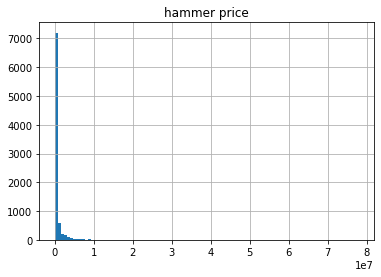

In [13]:
#check distribution of hammer price
df.hist(column='hammer price', bins=100)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4da068fe10>]],
      dtype=object)

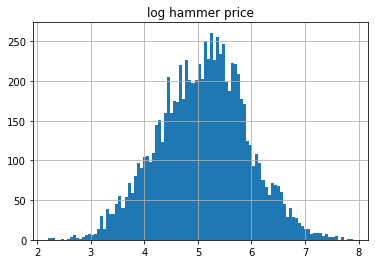

In [14]:
#create log hammer price
df['log hammer price'] = np.log10(df['hammer price'])
df.hist(column='log hammer price', bins=100)

In [0]:
#drop 'hammer price' column
df = df.drop(columns='hammer price')
df['image'].replace({'\n':' '},inplace=True,regex=True)

In [16]:
#bin log hammer price
bins = [0,3,3.25,3.5, 3.75, 4,4.25,4.5,4.75, 5,5.25, 5.5,5.75,6,6.25,6.5,6.75,7,7.25,7.5,7.75,8]
labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
df['binned'] = pd.cut(df['log hammer price'], bins=bins, labels=labels)
print(df)
df.shape
len(labels)

       creation_year  height(inch)  ...  log hammer price  binned
1             1964.0          22.0  ...          6.060698      13
3             1985.0          20.0  ...          4.698970       7
4             1983.0          20.0  ...          4.845098       8
5             1976.0           8.0  ...          4.845098       8
6             1985.0           8.0  ...          4.857332       8
...              ...           ...  ...               ...     ...
14699         1999.0           2.0  ...          5.496337      10
14700         1994.0           2.0  ...          5.685321      11
14701         1995.0          79.0  ...          5.643453      11
14702         1996.0          49.0  ...          4.778151       8
14703         1986.0          39.0  ...          3.032216       1

[8558 rows x 107 columns]


21

In [17]:
df

,creation_year,height(inch),width(inch),estimate_low($),estimate_high,auction_year,image,artist_birth,artist_rank,artist_points,num_bill,wealth_bill,canvas,paper,Acrylic,Mixed media,oil,auth_Ai Weiwei,auth_Alberto Giacometti,auth_Alex Katz,auth_Alexander Calder,auth_Alighiero Boëtti,auth_Andy Warhol,auth_Anselm Kiefer,auth_Antoni Tàpies,auth_Arnulf Rainer,auth_Carl Andre,auth_Christian Boltanski,auth_Christian Marclay,auth_Cindy Sherman,auth_Claes Oldenburg,auth_Cy Twombly,auth_Damien Hirst,auth_Dan Graham,auth_Daniel Buren,auth_David Hockney,auth_Dieter Roth,auth_Douglas Gordon,auth_Ed Ruscha,auth_Erwin Wurm,...,auth_Kiki Smith,auth_Lawrence Weiner,auth_Louise Bourgeois,auth_Lucio Fontana,auth_Man Ray,auth_Marcel Broodthaers,auth_Marcel Duchamp,auth_Maria Lassnig,auth_Marina Abramovic,auth_Marlene Dumas,auth_Martin Kippenberger,auth_Max Ernst,auth_Mike Kelley,auth_Mona Hatoum,auth_Nam June Paik,auth_Olafur Eliasson,auth_Pablo Picasso,auth_Paul Klee,auth_Paul McCarthy,auth_Pierre Huyghe,auth_Richard Long,auth_Richard Prince,auth_Richard Serra,auth_Rirkrit Tiravanija,auth_Robert Mapplethorpe,auth_Robert Rauschenberg,auth_Rosemarie Trockel,auth_Roy Lichtenstein,auth_Sigmar Polke,auth_Sol LeWitt,auth_Tacita Dean,auth_Thomas Ruff,auth_Thomas Schütte,auth_Tony Cragg,auth_Valie Export,auth_William Kentridge,auth_Yayoi Kusama,auth_Yoko Ono,log hammer price,binned
1,1964.0,22.0,22.0,1500000.0,2000000.0,2019.0,images/Andy Warhol-Flowers-1-1.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.060698,13
3,1985.0,20.0,16.0,60000.0,80000.0,2019.0,images/Andy Warhol-Self-Defense (Negative)-1-3...,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.698970,7
4,1983.0,20.0,16.0,50000.0,70000.0,2019.0,images/Andy Warhol-Untitled (Four)-1-4.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.845098,8
5,1976.0,8.0,11.0,70000.0,100000.0,2019.0,images/Andy Warhol-Torso-1-5.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.845098,8
6,1985.0,8.0,16.0,30000.0,50000.0,2019.0,"images/Andy Warhol-Are You ""Different?"" (Posit...",1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.857332,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14699,1999.0,2.0,15.0,149320.0,223980.0,2010.0,images/Marlene Dumas-Dancer-3-13.jpg,1953.0,114.0,14262.10,1011.0,3.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.496337,10
14700,1994.0,2.0,19.0,218820.0,281340.0,2010.0,"images/Marlene Dumas-""The Peeping Tom ""-3-14.jpg",1953.0,114.0,14262.10,1011.0,3.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.685321,11
14701,1995.0,79.0,39.0,250000.0,350000.0,2009.0,images/Marlene Dumas-Evil Eye-3-15.jpg,1953.0,98.0,14765.08,793.0,2.4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.643453,11
14702,1996.0,49.0,27.0,70000.0,100000.0,2009.0,images/Marlene Dumas-Transparent Slip-3-16.jpg,1953.0,98.0,14765.08,793.0,2.4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [18]:
#########################
# 2018 and beyond X / Y #
#########################

dataset = df.values

# Shuffle rows to make dev vs testing split easier later 
df = df.sample(frac=1)

# Train and Test to be done with < 2018 data
# Evaluation to be done with >= 2018 data

df_trainval = df[df['auction_year'] < 2018.]
df_test = df[df['auction_year'] >= 2018.]

print("df_trainval",df_trainval.shape)
print("df_test",df_test.shape)

df_trainval (7105, 107)
df_test (1453, 107)


In [19]:
# Making training/testing/evaluation for image/text

## this part for Images and Y value 
dataset_trainval = df_trainval.values
X_image_trainval = dataset_trainval[:,6]
Y_trainval = dataset_trainval[:,106]

dataset_test = df_test.values
X_image_test = dataset_test[:,6]
Y_test = dataset_test[:,106]

## this part for Text ##
dataset_trainval=df_trainval.drop(columns=['image','log hammer price','binned'])
dataset_test=df_test.drop(columns=['image','log hammer price','binned'])

X_text_trainval = dataset_trainval.values
X_text_test = dataset_test.values

## final check 
print ("X_image_trainval", X_image_trainval.shape)
print ("X_text_trainval", X_text_trainval.shape)
print ("Y_trainval", Y_trainval.shape)

#print(type(X_image_tt))
print ("X_image_test", X_image_test.shape)
print ("X_text_test", X_text_test.shape)
print ("Y_test", Y_test.shape)
#print(type(Y_tt))

X_text_test

X_image_trainval (7105,)
X_text_trainval (7105, 104)
Y_trainval (7105,)
X_image_test (1453,)
X_text_test (1453, 104)
Y_test (1453,)


array([[2010.,    3.,   90., ...,    0.,    0.,    0.],
       [1964.,   22.,   28., ...,    0.,    0.,    0.],
       [1989.,   59.,   51., ...,    0.,    0.,    0.],
       ...,
       [1980.,   40.,   40., ...,    0.,    0.,    0.],
       [1964.,    8.,    8., ...,    0.,    0.,    0.],
       [1992.,    4.,   27., ...,    0.,    0.,    0.]])

test image


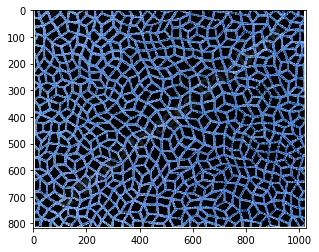

In [20]:
image_number_start = 3000
image_number_end = 3400

load_image = X_image_trainval[image_number_start:image_number_end]
load_text = X_text_trainval[image_number_start:image_number_end]
load_bin = Y_trainval[image_number_start:image_number_end]

load_image_test = X_image_test[image_number_start:image_number_end]
load_text_test = X_text_test[image_number_start:image_number_end]
load_bin_test = Y_test[image_number_start:image_number_end]

## load_image
#problem_image = 'images/Andy Warhol-Heaven and Hell Are Just One Breath Away (Positive and Negati                 ...-28-20.jpg' #X_image[510]
#print(problem_image)

# Output Images 
print("test image")
imgg = mpimg.imread(load_image[142]) 
plt.imshow(imgg) 


In [0]:
#################################
## CNN ##########################
#################################

In [22]:
################################
## Batch pre processing block ##
## You do it only once - #######
################################
"""
import cv2
import glob
from PIL import Image
from skimage.transform import resize
from keras.preprocessing import image
from keras.preprocessing.image import save_img

filenames = [img for img in glob.glob("images/*.jpg")]

images = []

for img in filenames:
    print("images/reduced"+img)
    n = cv2.imread(img)
    n2 = cv2.resize(n,(224,224))
    status = cv2.imwrite("images/reduced"+img , n2)
    print("Image writtedn to file-system : ", status)
    
"""

'\nimport cv2\nimport glob\nfrom PIL import Image\nfrom skimage.transform import resize\nfrom keras.preprocessing import image\nfrom keras.preprocessing.image import save_img\n\nfilenames = [img for img in glob.glob("images/*.jpg")]\n\nimages = []\n\nfor img in filenames:\n    print("images/reduced"+img)\n    n = cv2.imread(img)\n    n2 = cv2.resize(n,(224,224))\n    status = cv2.imwrite("images/reduced"+img , n2)\n    print("Image writtedn to file-system : ", status)\n    \n'

In [0]:
# Test section

#from PIL import Image
#from skimage.transform import resize
#from keras.preprocessing import image

import cv2
import glob
from PIL import Image
from skimage.transform import resize
from keras.preprocessing import image
from keras.preprocessing.image import save_img

x_Image_array = []
count = 0

for f in load_image:
    print(count, len(load_image), f)
    m = cv2.imread("images/reduced"+f)
    m2 = image.img_to_array(m)
    x_Image_array.append(m2)
    count += 1

#x_Image_array = np.array(x_Image_array)
#x_Image_array.shape



0 400 images/Georg Baselitz-"Schwarze Nase"-5-11.jpg


In [24]:
len(x_Image_array)

400

In [25]:
load_bin

array([8, 13, 14, 7, 2, 15, 13, 10, 13, 11, 9, 10, 8, 3, 3, 6, 12, 15, 10,
       9, 7, 5, 10, 9, 2, 7, 14, 13, 0, 6, 12, 9, 12, 6, 10, 12, 12, 6, 2,
       8, 12, 5, 17, 11, 11, 12, 4, 4, 12, 7, 17, 11, 7, 6, 12, 10, 10, 4,
       12, 6, 9, 6, 10, 8, 9, 12, 10, 17, 12, 8, 9, 12, 5, 19, 10, 8, 9,
       7, 8, 10, 10, 5, 4, 5, 10, 4, 3, 8, 9, 6, 5, 9, 15, 10, 7, 9, 13,
       10, 7, 18, 12, 9, 14, 6, 6, 11, 7, 12, 10, 8, 7, 10, 6, 7, 6, 10,
       9, 7, 12, 6, 4, 7, 13, 7, 9, 7, 10, 12, 5, 7, 7, 18, 6, 7, 10, 12,
       12, 14, 9, 8, 8, 7, 8, 7, 8, 11, 6, 11, 8, 10, 10, 10, 16, 7, 14,
       15, 7, 11, 10, 5, 9, 11, 11, 7, 10, 15, 7, 8, 10, 11, 6, 10, 8, 8,
       10, 8, 7, 11, 10, 10, 1, 10, 5, 8, 11, 6, 8, 7, 9, 2, 9, 8, 9, 10,
       11, 9, 10, 9, 13, 11, 10, 9, 8, 3, 10, 11, 10, 9, 6, 9, 0, 10, 11,
       8, 6, 2, 6, 13, 10, 12, 13, 13, 13, 11, 13, 8, 11, 8, 7, 9, 9, 6,
       10, 2, 4, 14, 8, 10, 10, 11, 14, 5, 7, 10, 6, 11, 8, 7, 3, 9, 9,
       10, 7, 8, 10, 7, 12, 12, 11, 5, 10,

In [26]:
load_text.shape

(400, 104)

In [27]:
# one-hot encode the log hammer price
encoder = LabelEncoder()
encoder.fit(load_bin)
encoded_load_bin = encoder.transform(load_bin)
dummy_load_bin = np_utils.to_categorical(encoded_load_bin) 
print(dummy_load_bin)
print(dummy_load_bin.shape)
dummy_load_bin.shape[1]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(400, 20)


20

In [28]:
# split training set and test set (actually, it is "Validation set")
x_Image_array_resized_train, x_Image_array_resized_test, load_bin_train, load_bin_test = train_test_split(x_Image_array, dummy_load_bin, test_size=0.25)

x_train = np.multiply(x_Image_array_resized_train, 1/255)
x_test = np.multiply(x_Image_array_resized_test, 1/255)
y_train = load_bin_train
y_test = load_bin_test

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(300, 224, 224, 3) (100, 224, 224, 3) (300, 20) (100, 20)


In [0]:
load_ext tensorboard

In [0]:
import tensorflow as tf

In [31]:
help(tf)

Help on package tensorflow:

NAME
    tensorflow - TensorFlow root package

PACKAGE CONTENTS


DATA
    __compiler_version__ = '7.3.1 20180303'
    __cxx11_abi_flag__ = 0
    __git_version__ = 'v2.0.0-rc2-26-g64c3d38'
    __monolithic_build__ = 0
    bfloat16 = tf.bfloat16
    bool = tf.bool
    complex128 = tf.complex128
    complex64 = tf.complex64
    double = tf.float64
    float16 = tf.float16
    float32 = tf.float32
    float64 = tf.float64
    half = tf.float16
    int16 = tf.int16
    int32 = tf.int32
    int64 = tf.int64
    int8 = tf.int8
    newaxis = None
    qint16 = tf.qint16
    qint32 = tf.qint32
    qint8 = tf.qint8
    quint16 = tf.quint16
    quint8 = tf.quint8
    resource = tf.resource
    string = tf.string
    uint16 = tf.uint16
    uint32 = tf.uint32
    uint64 = tf.uint64
    uint8 = tf.uint8
    variant = tf.variant

VERSION
    2.0.0

FILE
    /root/.local/lib/python3.6/site-packages/tensorflow/__init__.py




In [32]:
pip install --user --upgrade tensorflow

Requirement already up-to-date: tensorflow in /root/.local/lib/python3.6/site-packages (2.0.0)


In [0]:
!rm -rf ./logs/ 

In [0]:
from time import time
from datetime import datetime
from packaging import version
from keras.callbacks import TensorBoard
from tensorboard.plugins.hparams import api as hp


In [0]:
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([16, 32]))
HP_DROPOUT = hp.HParam('dropout', hp.Discrete([0.1, 0.2]))
HP_KERNEL = hp.HParam('kernel_size', hp.Discrete([5]))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam']))

METRIC_ACCURACY = 'accuracy'

#with tf.summary.FileWriter('logs/hparam_tuning'):
with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_KERNEL, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )



In [0]:
#!rm -rf ./logs/ 

#log_dir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")

### When training Keras models, you can use callbacks instead of writing these directly:
#tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir.format(time()))
#hp_callback = hp.KerasCallback(log_dir, hparams)

In [0]:
import tensorflow as tf
from keras import optimizers

def train_test_model(hparams):
  input_shape = (224,224,3)
  pool_size = 3
  final_node_size = dummy_load_bin.shape[1]

  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'),
    tf.keras.layers.MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),

    tf.keras.layers.Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'),
    tf.keras.layers.MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),

    tf.keras.layers.Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'),
    tf.keras.layers.MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),

    tf.keras.layers.Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'),
    tf.keras.layers.MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(final_node_size, activation=tf.nn.softmax),
  ])
  
  #model.add(Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same'))
  #model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  #model.add(MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'))

  #model.add(Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same'))
  #model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  ##model.add(MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'))
  #model.add(Dropout(hparams[HP_DROPOUT]))
    
  #model.add(Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same'))
  #model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  ##model.add(MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'))
  #model.add(Dropout(hparams[HP_DROPOUT]))

  #model.add(Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same'))
  #model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  #model.add(MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'))
    
  #model.add(Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same'))
  #model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  #model.add(MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'))
  ##model.add(Dropout(hparams[HP_DROPOUT]))

  ##model.add(Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same'))
  ##model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  ##model.add(MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'))

  ##model.add(Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same'))
  ##model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  ##model.add(MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'))
  ##model.add(Dropout(hparams[HP_DROPOUT]))

  #model.add(Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same'))
  #model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  #model.add(MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'))
  #model.add(Dropout(hparams[HP_DROPOUT]))

  #model.add(Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same'))
  #model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  #model.add(MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'))
  #model.add(Dropout(hparams[HP_DROPOUT]))

  #model.add(Flatten())
  #model.add(Dense(final_node_size, activation='softmax'))
    
  #sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
  model.compile(
      optimizer = hparams[HP_OPTIMIZER],
      loss='categorical_crossentropy', 
      metrics=['accuracy'],
      )
  
  #history = model.fit(x_train, y_train, batch_size=32, epochs=5, verbose=1, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])

  model.fit(x_train, y_train, batch_size=32, epochs=5) 
  _, accuracy = model.evaluate(x_test, y_test) 
  
  return accuracy



In [0]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [0]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for dropout_rate in HP_DROPOUT.domain.values:
    for kernel_size in HP_KERNEL.domain.values:
      for optimizer in HP_OPTIMIZER.domain.values:
        hparams = {
            HP_NUM_UNITS: num_units,
            HP_DROPOUT: dropout_rate,
            HP_KERNEL: kernel_size,
            HP_OPTIMIZER: optimizer,
        }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1

--- Starting trial: run-0
{'num_units': 16, 'dropout': 0.1, 'kernel_size': 5, 'optimizer': 'adam'}
Train on 300 samples
Epoch 1/10
300/300 [==============================] - 28s 93ms/sample - loss: 4.8457 - accuracy: 0.1033
Epoch 2/10
300/300 [==============================] - 27s 90ms/sample - loss: 3.3008 - accuracy: 0.1467
Epoch 3/10
300/300 [==============================] - 27s 89ms/sample - loss: 2.6680 - accuracy: 0.1900
Epoch 4/10
300/300 [==============================] - 27s 90ms/sample - loss: 2.4247 - accuracy: 0.2567
Epoch 5/10
300/300 [==============================] - 27s 91ms/sample - loss: 2.1523 - accuracy: 0.3767
Epoch 6/10
300/300 [==============================] - 27s 90ms/sample - loss: 2.0998 - accuracy: 0.3367
Epoch 7/10
300/300 [==============================] - 27s 89ms/sample - loss: 1.7780 - accuracy: 0.4400
Epoch 8/10
300/300 [==============================] - 27s 89ms/sample - loss: 1.6882 - accuracy: 0.4233
Epoch 9/10
300/300 [============================

In [0]:
#history = model.fit(x_train, y_train, batch_size=32, epochs=1, verbose=1, validation_data=(x_test, y_test), callbacks=[tensorboard_callback, hp_callback])
#history = model.fit(x_train, y_train, batch_size=32, epochs=50, callbacks=[tensorboard_callback])

help(tf)

In [0]:
# This evaluation is not actually done right. Need to get the real evaluation dataset (2018 and beyond)
#score = model.evaluate(x_test, y_test, verbose=1)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])
ls

In [0]:
#%tensorboard --logdir logs/fit
%tensorboard --logdir logs/hparam_tuning/

In [0]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
#################################
## TEXT NET #####################
#################################

In [0]:
load_text

In [0]:
# split training set and validation set
#load_text = load_text.values
X_text_train, X_text_test, Y_text_train, Y_text_test = train_test_split(load_text, dummy_load_bin, test_size=0.1)
print(X_text_train.shape, Y_text_train.shape,X_text_test.shape, Y_text_test.shape)
X_text_test[:,10]

In [0]:
# Split columns to StandardScalar the table more effectively. 

X_text_train_1 = X_text_train[:,:11]
X_text_train_2 = X_text_train[:,11:]

print("X_text_train_1", X_text_train_1.shape)
print("X_text_train_2", X_text_train_2.shape)

X_text_test_1 = X_text_test[:, :11]
X_text_test_2 = X_text_test[:,11:]

print("X_text_test_1", X_text_test_1.shape)
print("X_text_test_2", X_text_test_2.shape)


In [0]:
 #standardize X_train and X_test using mean and standard deviation of training samples
scaler = StandardScaler()

scaler.fit(X_text_train_1)
X_text_train_1_scaled = scaler.transform(X_text_train_1)
X_text_test_1_scaled = scaler.transform(X_text_test_1)

In [0]:
# construct our training and testing data points by concatenating the categorical features with the continuous features
X_text_train_scaled = np.hstack([X_text_train_1_scaled, X_text_train_2])
X_text_test_scaled = np.hstack([X_text_test_1_scaled, X_text_test_2])
#X_dev_scaled = np.hstack([X_dev_scaled, X_dev_2])

In [0]:
final_node_size = dummy_load_bin.shape[1]

#Create model
model = Sequential()

from keras.layers import BatchNormalization
from keras import regularizers

#Add more layers
model.add(Dense(128, activation='relu', input_shape = (104,), kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dropout(0.5))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(64, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(32, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
#model.add(Dropout(0.5))
model.add(Dense(final_node_size, activation='softmax', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))

In [0]:
# complie the model using adam optimizer and categorical crossentropy 
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.summary()


In [0]:
import datetime

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [0]:
# train the model
#hist = model.fit(X_text_train_scaled, Y_text_train, batch_size=64, epochs=100, shuffle=True, callbacks=[tensorboard_callback])
hist = model.fit(X_text_train_scaled, Y_text_train, batch_size=64, epochs=100,validation_data= (X_text_test_scaled, Y_text_test), shuffle=True, callbacks=[tensorboard_callback])

In [0]:
model.evaluate(x = X_text_test_scaled, y = Y_text_test)

In [0]:
# plot the loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()


#plot the accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()

In [0]:
!tensorboard --logdir logs/fit